In [4]:
# Make a shot map and a pass map using Statsbomb data
# Set match id in match_id_required.

# Function to draw the pitch
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path

# Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

# ID for England vs Sweden Womens World Cup
match_id_required = 69301
home_team_required = "England Women's"
away_team_required = "Sweden Women's"

# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name = str(match_id_required) + ".json"

data_dir = Path("/Users/thomas/Documents/data/football")
statsbomb_dir = data_dir.joinpath("open-data/data")


In [5]:
# Load in all match events
with open(statsbomb_dir.joinpath("events").joinpath(file_name)) as data_file:
    # print (mypath+'events/'+file)
    data = json.load(data_file)

# get the nested structure into a dataframe
# store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas import json_normalize

df = json_normalize(data, sep="_").assign(match_id=file_name[:-5])


# A dataframe of shots
shots = df.loc[df["type_name"] == "Shot"].set_index("id")


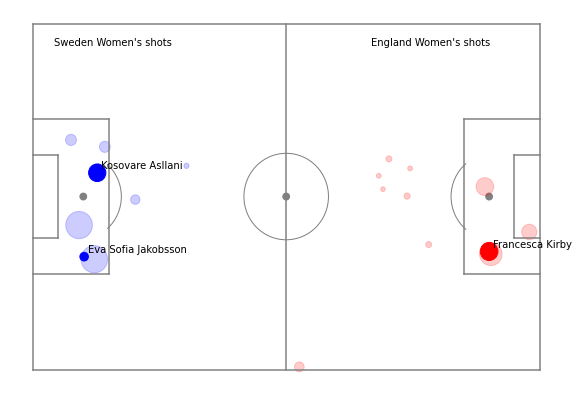

In [13]:
# Draw the pitch
from football_modelling.plotting import createPitch

(fig, ax) = createPitch(pitchLengthX, pitchWidthY, "yards", "gray")

# Plot the shots
for i, shot in shots.iterrows():
    x = shot["location"][0]
    y = shot["location"][1]

    goal = shot["shot_outcome_name"] == "Goal"
    team_name = shot["team_name"]

    # circleSize=2
    circleSize = np.sqrt(shot["shot_statsbomb_xg"]) * 6

    if team_name == home_team_required:
        if goal:
            shotCircle = plt.Circle((x, pitchWidthY - y), circleSize, color="red")
            plt.text((x + 1), pitchWidthY - y + 1, shot["player_name"])
        else:
            shotCircle = plt.Circle((x, pitchWidthY - y), circleSize, color="red")
            shotCircle.set_alpha(0.2)
    elif team_name == away_team_required:
        if goal:
            shotCircle = plt.Circle((pitchLengthX - x, y), circleSize, color="blue")
            plt.text((pitchLengthX - x + 1), y + 1, shot["player_name"])
        else:
            shotCircle = plt.Circle((pitchLengthX - x, y), circleSize, color="blue")
            shotCircle.set_alpha(0.2)
    ax.add_patch(shotCircle)


plt.text(5, 75, away_team_required + " shots")
plt.text(80, 75, home_team_required + " shots")

fig.set_size_inches(10, 7)
fig.savefig("Output/shots.pdf", dpi=100)
plt.show()

# Exercise:
# 1, Create a dataframe of passes which contains all the passes in the match
# 2, Plot the start point of every Sweden pass. Attacking left to right.
# 3, Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
# 4, Plot arrows to show where the passes we


In [15]:
# 1, Create a dataframe of passes which contains all the passes in the match
passes = df.loc[df["type_name"] == "Pass"]


In [22]:
[x for x in passes.columns.values if "recipient" in x]


['pass_recipient_id', 'pass_recipient_name']

In [21]:
pass_columns = [x for x in passes.columns.values if "pass" in x]
passes[["player_name"] + pass_columns]


,player_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,...,pass_cross,pass_assisted_shot_id,pass_shot_assist,pass_through_ball,shot_key_pass_id,pass_goal_assist,pass_aerial_won,pass_cut_back,pass_no_touch,pass_straight
4,Ellen White,4641.0,Francesca Kirby,2.102380,0.442374,1.0,Ground Pass,"[61.9, 40.9]",40.0,Right Foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Francesca Kirby,10178.0,Lucy Bronze,21.317833,1.769112,1.0,Ground Pass,"[78.4, 58.5]",40.0,Right Foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Lucy Bronze,4654.0,Nikita Parris,18.984203,0.725767,1.0,Ground Pass,"[98.9, 77.9]",40.0,Right Foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Nikita Parris,10172.0,Jill Scott,11.287161,-1.695151,1.0,Ground Pass,"[93.3, 64.3]",40.0,Right Foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Jill Scott,NaN,NaN,25.223997,-0.403330,1.0,Ground Pass,"[117.4, 54.7]",40.0,Right Foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,Francesca Kirby,15553.0,Karen Julia Carney,14.024621,0.274382,1.0,Ground Pass,"[90.5, 23.9]",40.0,Right Foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3274,Karen Julia Carney,10252.0,Alex Greenwood,17.380737,-0.936501,1.0,Ground Pass,"[102.1, 5.4]",38.0,Left Foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3277,Alex Greenwood,15553.0,Karen Julia Carney,17.293930,-3.037321,1.0,Ground Pass,"[85.7, 6.8]",38.0,Left Foot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3280,Karen Julia Carney,NaN,NaN,42.174046,1.041356,3.0,High Pass,"[108.1, 44.9]",40.0,Right Foot,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


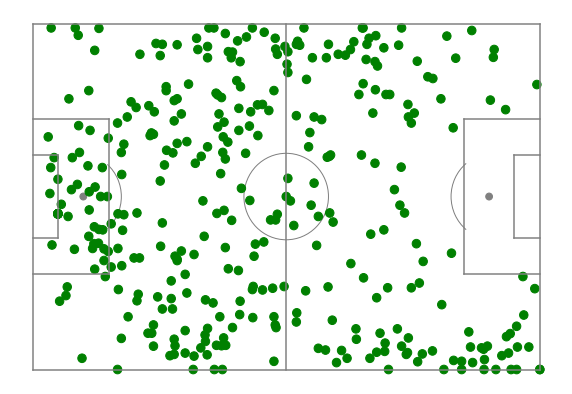

In [40]:
# 2, Plot the start point of every Sweden pass. Attacking left to right.
(fig, ax) = createPitch(pitchLengthX, pitchWidthY, "yards", "gray")

for i, fpass in passes.iterrows():
    x = fpass["location"][0]
    y = fpass["location"][1]
    team_name = fpass["team_name"]
    player_name = fpass["player_name"]
    circleSize = 1

    if team_name == away_team_required:
        passCircle = plt.Circle((x, pitchWidthY - y), circleSize, color="green")
        ax.add_patch(passCircle)

fig.set_size_inches(10, 7)
fig.savefig("Output/passes.pdf", dpi=100)
plt.show()


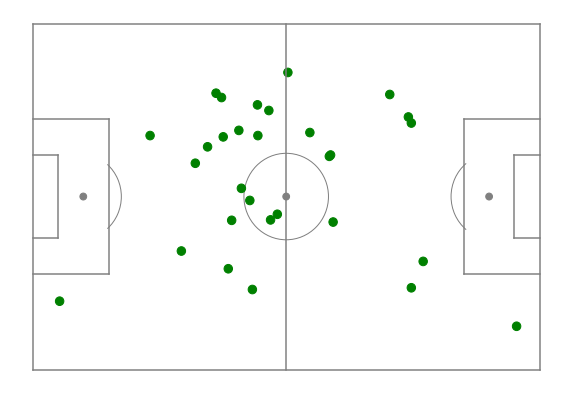

In [42]:
# 3, Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)

(fig, ax) = createPitch(pitchLengthX, pitchWidthY, "yards", "gray")

for i, fpass in passes.iterrows():
    x = fpass["location"][0]
    y = fpass["location"][1]
    team_name = fpass["team_name"]
    player_name = fpass["player_name"]
    circleSize = 1

    if team_name == away_team_required:
        if player_name == "Sara Caroline Seger":
            passCircle = plt.Circle((x, pitchWidthY - y), circleSize, color="green")
            ax.add_patch(passCircle)

fig.set_size_inches(10, 7)
fig.savefig("Output/passes.pdf", dpi=100)
plt.show()


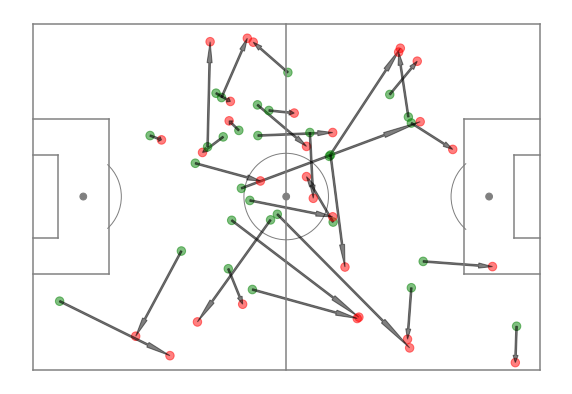

In [59]:
(fig, ax) = createPitch(pitchLengthX, pitchWidthY, "yards", "gray")

for i, fpass in passes.iterrows():
    team_name = fpass["team_name"]
    player_name = fpass["player_name"]

    if team_name == away_team_required:
        if player_name == "Sara Caroline Seger":
            x = fpass["location"][0]
            y = fpass["location"][1]
            xi = fpass["pass_end_location"][0]
            yi = fpass["pass_end_location"][1]

            circleSize = 1
            passCircle = plt.Circle((x, pitchWidthY - y), circleSize, color="green")
            endCircle = plt.Circle((xi, pitchWidthY - yi), circleSize, color="red")
            passArrow = plt.Arrow(
                x, pitchWidthY - y, -(x - xi), -(-y + yi), width=2, color="black"
            )
            for object in [passCircle, endCircle, passArrow]:
                object.set_alpha(0.5)
                ax.add_patch(object)
            # ax.add_patch(passArrow)
            # ax.add_patch(passCircle)
            # ax.add_patch(endCircle)

fig.set_size_inches(10, 7)
fig.savefig("Output/passes.pdf", dpi=100)
plt.show()
